# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [13]:
base_url = "http://api.openweathermap.org/data/2.5/weather"

url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key

In [14]:
counter = 1
loop_counter = 1

#empty lists to append API data into
city_name = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
country = []
date = []

print(f"--------------------------------")
print(f"Beginning Data Retrieval")
print(f"--------------------------------")

for city in cities:
    if counter <= 50:
        try:
            city_data = requests.get(f"{url}&q={city}").json()
            
            city_name.append(city_data["name"])
            max_temp.append(city_data["main"]["temp_max"])
            humidity.append(city_data["main"]["humidity"])
            cloudiness.append(city_data["clouds"]["all"])
            wind_speed.append(city_data["wind"]["speed"])
            lat.append(city_data["coord"]["lat"])
            lng.append(city_data["coord"]["lon"])
            country.append(city_data["sys"]["country"])
            date.append(city_data["dt"])
            print(f"Processing Record {counter} of Set {loop_counter} complete. | {city}")

            counter = counter + 1

        except KeyError:
            print(f"City not found. Skipping...")
            counter = counter + 1
            
    else:
        counter = 1
        loop_counter += 1

print("--------------------------")
print("Data Retreival Complete")
print("--------------------------")

--------------------------------
Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 complete. | rikitea
Processing Record 2 of Set 1 complete. | cape town
Processing Record 3 of Set 1 complete. | vao
Processing Record 4 of Set 1 complete. | rawson
Processing Record 5 of Set 1 complete. | mareeba
Processing Record 6 of Set 1 complete. | ushuaia
Processing Record 7 of Set 1 complete. | kapaa
Processing Record 8 of Set 1 complete. | marietta
Processing Record 9 of Set 1 complete. | mecca
Processing Record 10 of Set 1 complete. | kaitangata
Processing Record 11 of Set 1 complete. | puerto varas
City not found. Skipping...
Processing Record 13 of Set 1 complete. | bundaberg
Processing Record 14 of Set 1 complete. | yellowknife
Processing Record 15 of Set 1 complete. | wewak
Processing Record 16 of Set 1 complete. | punta arenas
Processing Record 17 of Set 1 complete. | tuktoyaktuk
Processing Record 18 of Set 1 complete. | chokurdakh
Processing Record 19 o

Processing Record 15 of Set 4 complete. | erenhot
Processing Record 16 of Set 4 complete. | pevek
Processing Record 17 of Set 4 complete. | upernavik
Processing Record 18 of Set 4 complete. | yulara
Processing Record 19 of Set 4 complete. | adrar
Processing Record 20 of Set 4 complete. | lebu
Processing Record 21 of Set 4 complete. | valparaiso
Processing Record 22 of Set 4 complete. | khuzhir
Processing Record 23 of Set 4 complete. | ayan
Processing Record 24 of Set 4 complete. | thompson
Processing Record 25 of Set 4 complete. | acapulco
Processing Record 26 of Set 4 complete. | norman wells
Processing Record 27 of Set 4 complete. | salalah
Processing Record 28 of Set 4 complete. | roald
Processing Record 29 of Set 4 complete. | lompoc
Processing Record 30 of Set 4 complete. | kodiak
Processing Record 31 of Set 4 complete. | zhezkazgan
Processing Record 32 of Set 4 complete. | peringat
City not found. Skipping...
Processing Record 34 of Set 4 complete. | nikolskoye
Processing Record 

Processing Record 32 of Set 7 complete. | roebourne
Processing Record 33 of Set 7 complete. | san patricio
Processing Record 34 of Set 7 complete. | zlobin
Processing Record 35 of Set 7 complete. | catamarca
Processing Record 36 of Set 7 complete. | tambacounda
Processing Record 37 of Set 7 complete. | tygda
Processing Record 38 of Set 7 complete. | gushikawa
Processing Record 39 of Set 7 complete. | turan
Processing Record 40 of Set 7 complete. | severo-kurilsk
Processing Record 41 of Set 7 complete. | verkh-chebula
Processing Record 42 of Set 7 complete. | castro
Processing Record 43 of Set 7 complete. | rajula
Processing Record 44 of Set 7 complete. | ishigaki
Processing Record 45 of Set 7 complete. | majene
Processing Record 46 of Set 7 complete. | kumluca
Processing Record 47 of Set 7 complete. | fuchu
Processing Record 48 of Set 7 complete. | berlevag
City not found. Skipping...
Processing Record 50 of Set 7 complete. | bud
Processing Record 1 of Set 8 complete. | vila real de sa

Processing Record 50 of Set 10 complete. | saint-louis
Processing Record 1 of Set 11 complete. | santa luzia
City not found. Skipping...
Processing Record 3 of Set 11 complete. | beringovskiy
Processing Record 4 of Set 11 complete. | broken hill
Processing Record 5 of Set 11 complete. | mandurah
Processing Record 6 of Set 11 complete. | llodio
Processing Record 7 of Set 11 complete. | rivadavia
Processing Record 8 of Set 11 complete. | black river
Processing Record 9 of Set 11 complete. | kupino
Processing Record 10 of Set 11 complete. | santa maria
Processing Record 11 of Set 11 complete. | tongchuan
Processing Record 12 of Set 11 complete. | inhambane
Processing Record 13 of Set 11 complete. | san quintin
Processing Record 14 of Set 11 complete. | oyem
Processing Record 15 of Set 11 complete. | marang
Processing Record 16 of Set 11 complete. | sovetskiy
Processing Record 17 of Set 11 complete. | la paz
Processing Record 18 of Set 11 complete. | leira
Processing Record 19 of Set 11 co

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
#create a dataframe for city weather
city_weather_df = pd.DataFrame({"City": city_name,
                                "Latitude": lat,
                                "Longitude":lng,
                                "Max Temp": max_temp,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Wind Speed": wind_speed,
                                "Country": country,
                                "Date": date}                              
                              )

city_weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.89,68,6,13.62,PF,1650324679
1,Cape Town,-33.9258,18.4232,59.92,88,0,13.00,ZA,1650324593
2,Vao,-22.6667,167.4833,75.99,75,50,5.44,NC,1650324866
3,Rawson,-43.3002,-65.1023,61.23,67,5,5.17,AR,1650324866
4,Mareeba,-17.0000,145.4333,77.67,77,100,4.88,AU,1650324867
...,...,...,...,...,...,...,...,...,...
552,Anzhero-Sudzhensk,56.0810,86.0285,28.74,78,74,4.99,RU,1650325200
553,Francistown,-21.1700,27.5079,60.96,80,55,5.79,BW,1650325200
554,Grogol,-7.6011,110.8186,78.24,88,100,1.21,ID,1650325201
555,Lethem,3.3803,-59.7968,83.62,56,67,9.33,GY,1650325201


In [59]:
city_weather_df.to_csv(r"../output_data/cities.csv")

In [16]:
city_weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,19.587751,18.873087,59.050521,71.046679,58.883303,8.375063,1.650325e+09
std,33.912527,91.267791,20.844135,21.160690,39.000770,5.446502,1.299637e+02
min,-54.800000,-175.200000,-16.370000,1.000000,0.000000,0.000000,1.650325e+09
25%,-8.118100,-63.598600,44.690000,62.000000,17.000000,4.210000,1.650325e+09
50%,21.642200,20.866700,61.500000,76.000000,75.000000,7.200000,1.650325e+09
75%,48.649900,103.140800,77.180000,87.000000,99.000000,11.500000,1.650325e+09
max,78.218600,179.316700,96.940000,100.000000,100.000000,29.330000,1.650325e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
over_humidity_cities_df = city_weather_df.loc[city_weather_df["Humidity"] > 100, :]
over_humidity_cities_df

In [27]:
#  Get the indices of cities that have humidity over 100%.
over_humidity_cities_df.index

Int64Index([], dtype='int64')

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_weather_df.dropna(inplace=False)
clean_city_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.89,68,6,13.62,PF,1650324679
1,Cape Town,-33.9258,18.4232,59.92,88,0,13.00,ZA,1650324593
2,Vao,-22.6667,167.4833,75.99,75,50,5.44,NC,1650324866
3,Rawson,-43.3002,-65.1023,61.23,67,5,5.17,AR,1650324866
4,Mareeba,-17.0000,145.4333,77.67,77,100,4.88,AU,1650324867
...,...,...,...,...,...,...,...,...,...
552,Anzhero-Sudzhensk,56.0810,86.0285,28.74,78,74,4.99,RU,1650325200
553,Francistown,-21.1700,27.5079,60.96,80,55,5.79,BW,1650325200
554,Grogol,-7.6011,110.8186,78.24,88,100,1.21,ID,1650325201
555,Lethem,3.3803,-59.7968,83.62,56,67,9.33,GY,1650325201


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

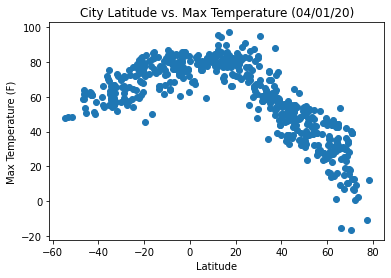

In [29]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature " + "(" + "04/01/20" + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Humidity Plot

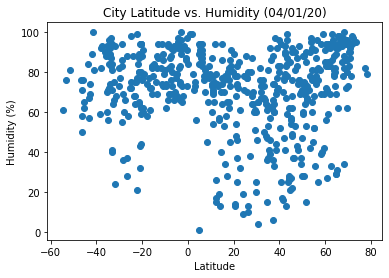

In [30]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"])
plt.title("City Latitude vs. Humidity " + "(" + "04/01/20" + ")")
plt.ylabel("Humidity " + "(" + "%" + ")")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

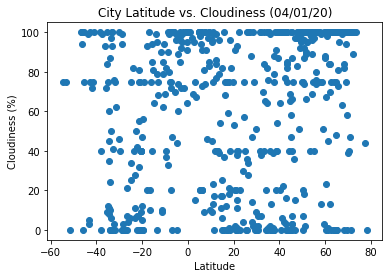

In [31]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness " + "(" + "04/01/20" + ")")
plt.ylabel("Cloudiness " + "(" + "%" + ")")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

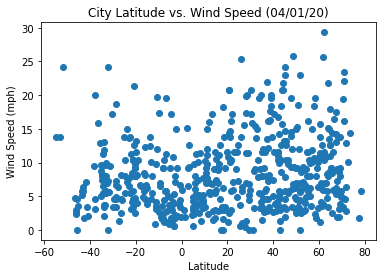

In [32]:
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed " + "(" + "04/01/20" + ")")
plt.ylabel("Wind Speed " + "(" + "mph" + ")")
plt.xlabel("Latitude")
plt.show()

## Linear Regression

In [33]:
#create dataframes for resepctive hemispheres 
northern_hem_df = city_weather_df.query(f"Latitude > 0")
southern_hem_df = city_weather_df.query(f"Latitude < 0")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

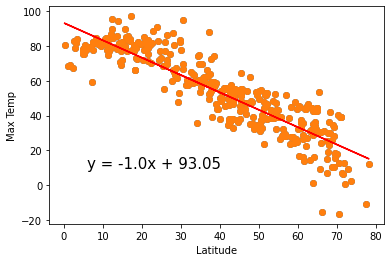

The r-value is: -0.8923564977203587


In [34]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Max Temp"]

plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)

plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.show()

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

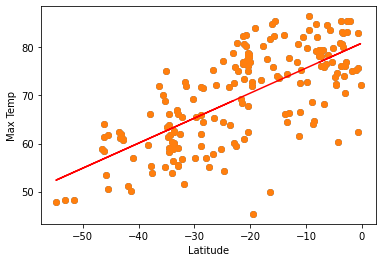

The r-value is: 0.6989590510125064


In [35]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Max Temp"]

plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)

plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.show()

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

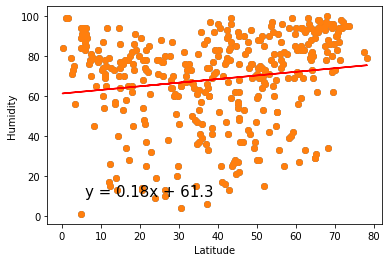

The r-value is: 0.1603267513169217


In [36]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Humidity"]

plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

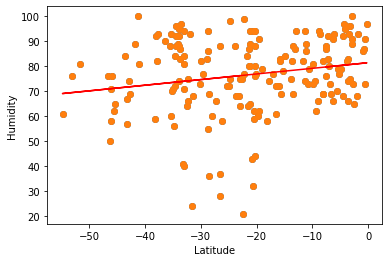

The r-value is: 0.19650246933898588


In [37]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Humidity"]

plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

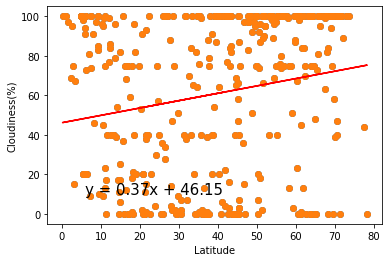

The r-value is: 0.19303648044323485


In [39]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Cloudiness"]

plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)

plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.show()

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

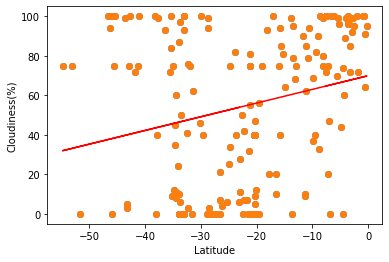

The r-value is: 0.2431607985593185


In [40]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Cloudiness"]

plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)

plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.show()

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

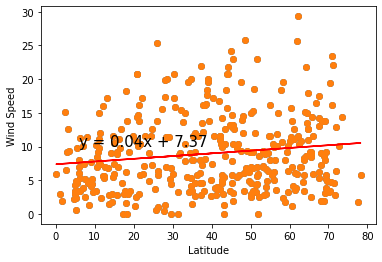

The r-value is: 0.14479158687275318


In [41]:
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Wind Speed"]

plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

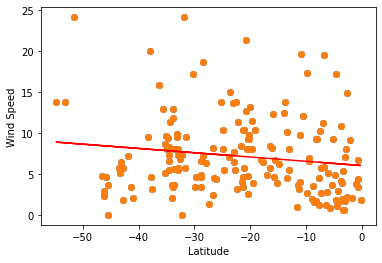

The r-value is: -0.14829483083782044


In [42]:
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Wind Speed"]

plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

print(f"The r-value is: {rvalue}")